<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |



Lets download the dataset

In [3]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-01-18 17:15:07--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.001s  

2019-01-18 17:15:07 (15.6 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [7]:
df = pd.read_csv('loan_train.csv')
df.head(1000)
#df.describe()
#df.info()
#df.drop(['unnamed'],axis=1)
#df=df.drop(df.columns[1], axis=1)
df=df.drop(df.columns[0], axis=1)
df1=df.drop(df.columns[1], axis=1)
df1

,Unnamed: 0.1,Principal,terms,effective_date,due_date,age,education,Gender
0,0,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,800,15,9/10/2016,9/24/2016,26,college,male
8,10,300,7,9/10/2016,9/16/2016,29,college,male
9,11,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


### Exploratory Data analysis

In [9]:
import seaborn as sns

(array([  86.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  260.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

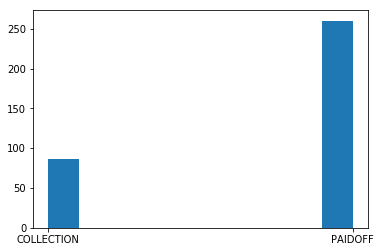

In [10]:
plt.hist(x='loan_status',data=df)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


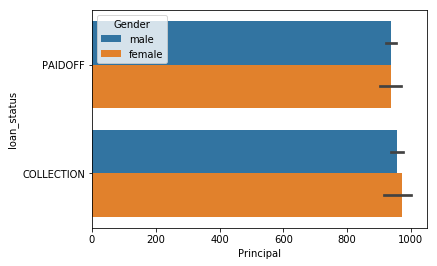

In [11]:
sns.barplot(x='Principal',y='loan_status',data=df,hue='Gender')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


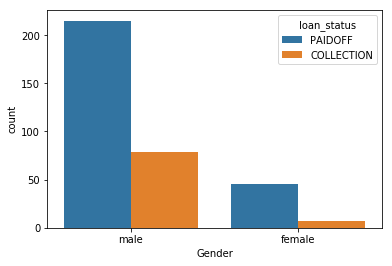

In [12]:
sns.countplot(x='Gender',data=df,hue='loan_status')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


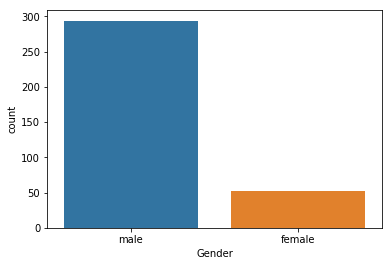

In [13]:
sns.countplot(x='Gender',data=df)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


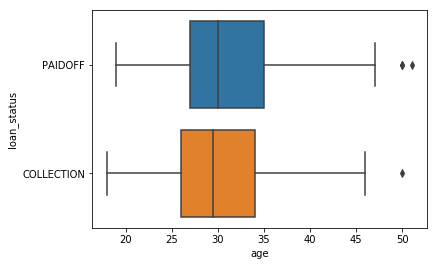

In [14]:
sns.boxplot(x='age',y='loan_status',data=df)


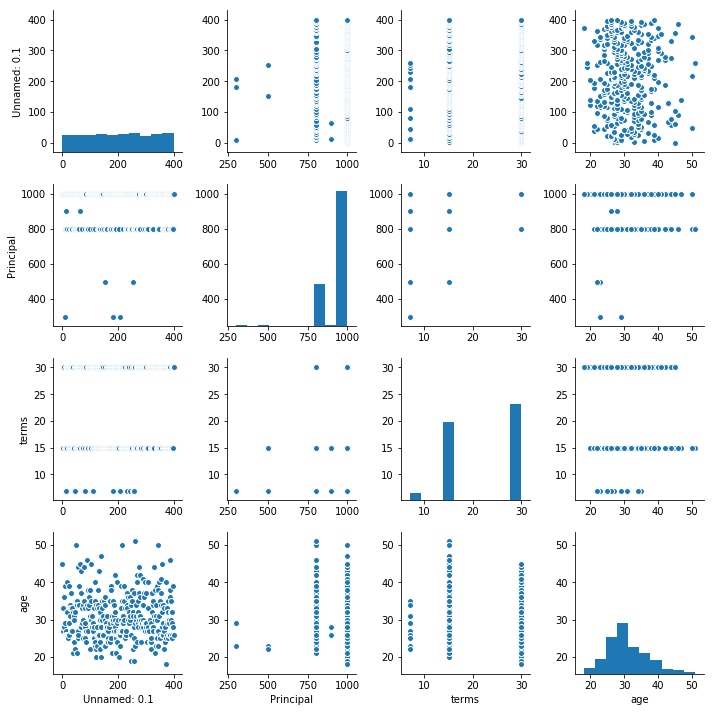

In [15]:
sns.pairplot(data=df)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


<function matplotlib.pyplot.tight_layout>

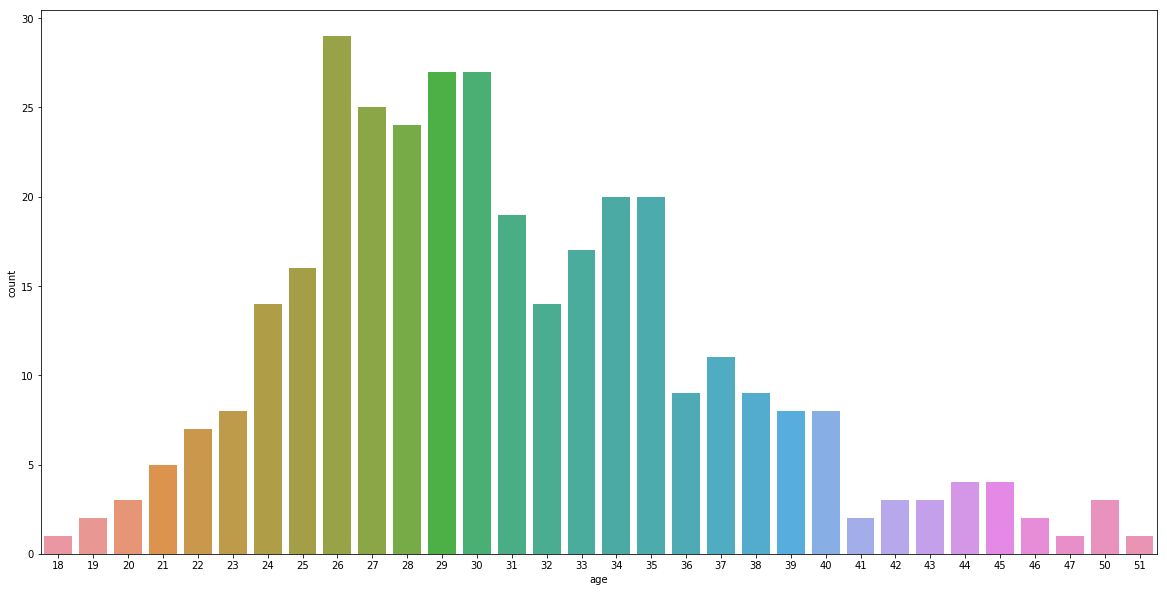

In [16]:

plt.figure(figsize=(20,10))
sns.countplot(x='age',data=df)
plt.tight_layout


In [17]:
df


,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [12]:
df.education

0      High School or Below
1                  Bechalor
2                   college
3                   college
4                   college
5                   college
6                   college
7                   college
8                   college
9      High School or Below
10                  college
11                  college
12     High School or Below
13                  college
14     High School or Below
15     High School or Below
16     High School or Below
17                  college
18                  college
19     High School or Below
20                  college
21     High School or Below
22                 Bechalor
23                 Bechalor
24                  college
25                  college
26     High School or Below
27                  college
28                  college
29                  college
               ...         
316                Bechalor
317                 college
318                 college
319    High School or Below
320    High School o

In [18]:
df.shape

(346, 9)

### Convert to date time object 

In [19]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [57]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /Users/Saeed/anaconda/envs/python3.6

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2o             |       h26aff7b_0         3.4 MB  anaconda
    ca-certificates-2018.03.07 |                0         124 KB  anaconda
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following packages will be UPDATED:

    ca-certificates: 2018.03.07-0      --> 2018.03.07-0      anaconda
    openssl:         1.0.2o-h26aff7b_0 --> 1.0.2o-h26aff7b_0 anaconda


openssl-1.0.2o       |  3.4 MB | ####################################### | 100% 
ca-certificates-2018 |  124 KB | ####################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

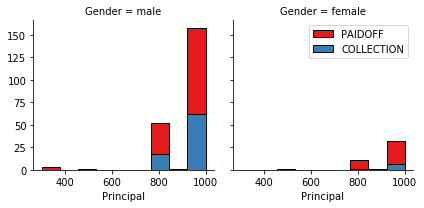

In [14]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

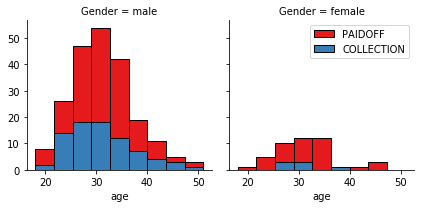

In [20]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

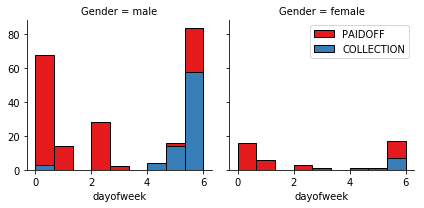

In [21]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [22]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [62]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [27]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [28]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [65]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [66]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [68]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [69]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [70]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [34]:
df_1=pd.get_dummies(df.education)

df_x1=pd.concat([df,df_1],axis=1)
df_x2=df_x1.drop(columns=['education','effective_date','due_date'])
df_x3=df_x2.drop(columns=['loan_status'])

df_x3

,Unnamed: 0.1,Principal,terms,age,Gender,dayofweek,weekend,Bechalor,High School or Below,Master or Above,college
0,0,1000,30,45,0,3,0,0,1,0,0
1,2,1000,30,33,1,3,0,1,0,0,0
2,3,1000,15,27,0,3,0,0,0,0,1
3,4,1000,30,28,1,4,1,0,0,0,1
4,6,1000,30,29,0,4,1,0,0,0,1
5,7,1000,30,36,0,4,1,0,0,0,1
6,8,1000,30,28,0,4,1,0,0,0,1
7,9,800,15,26,0,5,1,0,0,0,1
8,10,300,7,29,0,5,1,0,0,0,1
9,11,1000,15,39,0,5,1,0,1,0,0


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(df_x3)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
scaled_features = scaler.transform(df_x3)

In [35]:
df_feat = pd.DataFrame(scaled_features,columns=df_x3.columns)
df_feat.head()

,Unnamed: 0.1,Principal,terms,age,Gender,dayofweek,weekend,Bechalor,High School or Below,Master or Above,college
0,-1.753516,0.515785,0.920718,2.331526,-0.420560,-0.261221,-1.205778,-0.381701,1.136394,-0.076249,-0.869681
1,-1.736168,0.515785,0.920718,0.341701,2.377782,-0.261221,-1.205778,2.619854,-0.879977,-0.076249,-0.869681
2,-1.727495,0.515785,-0.959111,-0.653211,-0.420560,-0.261221,-1.205778,-0.381701,-0.879977,-0.076249,1.149847
3,-1.718821,0.515785,0.920718,-0.487392,2.377782,0.121755,0.829340,-0.381701,-0.879977,-0.076249,1.149847
4,-1.701474,0.515785,0.920718,-0.321573,-0.420560,0.121755,0.829340,-0.381701,-0.879977,-0.076249,1.149847


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df_x2['loan_status'],
                                                    test_size=0.30)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=4)

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [41]:
pred = knn.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(confusion_matrix(y_test,pred))

[[23  0]
 [ 0 81]]


In [44]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

 COLLECTION       1.00      1.00      1.00        23
    PAIDOFF       1.00      1.00      1.00        81

avg / total       1.00      1.00      1.00       104



In [45]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

### Function to see the best k value and error rate at that value 

Text(0,0.5,'Error Rate')

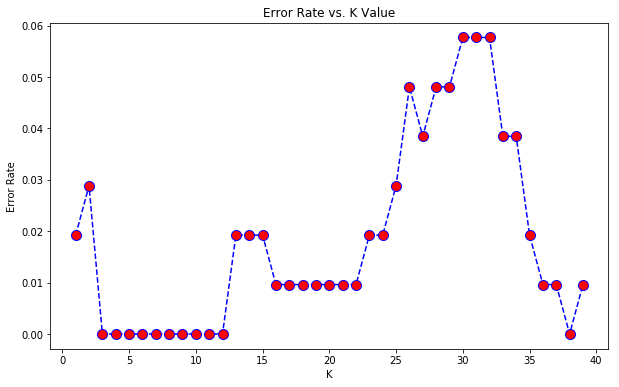

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=4')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=4


[[23  0]
 [ 0 81]]


             precision    recall  f1-score   support

 COLLECTION       1.00      1.00      1.00        23
    PAIDOFF       1.00      1.00      1.00        81

avg / total       1.00      1.00      1.00       104



In [48]:
 from sklearn.metrics import jaccard_similarity_score

In [49]:
jaccard_similarity_score(y_test, pred)

1.0

###  As you can see from the graph the best k-value is anywhere between 3-12 and error rate is minimum. So we can choose any value from these values and we will get the same result. 

# Decision Tree

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X=df_x2.drop('loan_status',axis=1)
y=df_x2['loan_status']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [53]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
predictions = dtree.predict(X_test)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

 COLLECTION       1.00      1.00      1.00        27
    PAIDOFF       1.00      1.00      1.00        77

avg / total       1.00      1.00      1.00       104



In [57]:
jaccard_similarity_score(y_test, predictions)

1.0

### As we can see from the classification Report and Jaccard_similarity_score that our Prediction model is showing the best result without any error. But this might be the case of over-fitting.   

In [47]:
df_x2['loan_status']

0         PAIDOFF
1         PAIDOFF
2         PAIDOFF
3         PAIDOFF
4         PAIDOFF
5         PAIDOFF
6         PAIDOFF
7         PAIDOFF
8         PAIDOFF
9         PAIDOFF
10        PAIDOFF
11        PAIDOFF
12        PAIDOFF
13        PAIDOFF
14        PAIDOFF
15        PAIDOFF
16        PAIDOFF
17        PAIDOFF
18        PAIDOFF
19        PAIDOFF
20        PAIDOFF
21        PAIDOFF
22        PAIDOFF
23        PAIDOFF
24        PAIDOFF
25        PAIDOFF
26        PAIDOFF
27        PAIDOFF
28        PAIDOFF
29        PAIDOFF
          ...    
316    COLLECTION
317    COLLECTION
318    COLLECTION
319    COLLECTION
320    COLLECTION
321    COLLECTION
322    COLLECTION
323    COLLECTION
324    COLLECTION
325    COLLECTION
326    COLLECTION
327    COLLECTION
328    COLLECTION
329    COLLECTION
330    COLLECTION
331    COLLECTION
332    COLLECTION
333    COLLECTION
334    COLLECTION
335    COLLECTION
336    COLLECTION
337    COLLECTION
338    COLLECTION
339    COLLECTION
340    COL

# Support Vector Machine

In [58]:
df_target=df_x2['loan_status']

In [59]:
df_feature=df_x2.drop('loan_status',axis=1)

In [60]:
df_feature

,Unnamed: 0.1,Principal,terms,age,Gender,dayofweek,weekend,Bechalor,High School or Below,Master or Above,college
0,0,1000,30,45,0,3,0,0,1,0,0
1,2,1000,30,33,1,3,0,1,0,0,0
2,3,1000,15,27,0,3,0,0,0,0,1
3,4,1000,30,28,1,4,1,0,0,0,1
4,6,1000,30,29,0,4,1,0,0,0,1
5,7,1000,30,36,0,4,1,0,0,0,1
6,8,1000,30,28,0,4,1,0,0,0,1
7,9,800,15,26,0,5,1,0,0,0,1
8,10,300,7,29,0,5,1,0,0,0,1
9,11,1000,15,39,0,5,1,0,1,0,0


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df_feature, np.ravel(df_target), test_size=0.30, random_state=101)

In [63]:
from sklearn.svm import SVC

In [64]:
model = SVC()

In [65]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
predictions = model.predict(X_test)

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
print(confusion_matrix(y_test,predictions))

[[ 2 24]
 [ 0 78]]


In [69]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

 COLLECTION       1.00      0.08      0.14        26
    PAIDOFF       0.76      1.00      0.87        78

avg / total       0.82      0.77      0.69       104



### From this we can see that perdiction of our model is not that good. Further more we can try for Parameter Search.This means our model needs to have it parameters adjusted (it may also help to normalize the data).

### Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV.


In [70]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [73]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] gamma=1, C=0.1, kernel=rbf ......................................
[CV]  gamma=1, C=0.1, kernel=rbf, score=0.7530864197530864, total=   0.0s
[CV] gamma=1, C=0.1, kernel=rbf ......................................
[CV]  gamma=1, C=0.1, kernel=rbf, score=0.7530864197530864, total=   0.0s
[CV] gamma=1, C=0.1, kernel=rbf ......................................
[CV] ........... gamma=1, C=0.1, kernel=rbf, score=0.75, total=   0.0s
[CV] gamma=0.1, C=0.1, kernel=rbf ....................................
[CV]  gamma=0.1, C=0.1, kernel=rbf, score=0.7530864197530864, total=   0.0s
[CV] gamma=0.1, C=0.1, kernel=rbf ....................................
[CV]  gamma=0.1, C=0.1, kernel=rbf, score=0.7530864197530864, total=   0.0s
[CV] gamma=0.1, C=0.1, kernel=rbf ....................................
[CV] ......... gamma=0.1, C=0.1, kernel=rbf, score=0.75, total=   0.0s
[CV] gamma=0.01, C=0.1, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............ gamma=1, C=10, kernel=rbf, score=0.75, total=   0.0s
[CV] gamma=0.1, C=10, kernel=rbf .....................................
[CV]  gamma=0.1, C=10, kernel=rbf, score=0.8148148148148148, total=   0.0s
[CV] gamma=0.1, C=10, kernel=rbf .....................................
[CV]  gamma=0.1, C=10, kernel=rbf, score=0.8024691358024691, total=   0.0s
[CV] gamma=0.1, C=10, kernel=rbf .....................................
[CV] ........... gamma=0.1, C=10, kernel=rbf, score=0.8, total=   0.0s
[CV] gamma=0.01, C=10, kernel=rbf ....................................
[CV]  gamma=0.01, C=10, kernel=rbf, score=0.9876543209876543, total=   0.0s
[CV] gamma=0.01, C=10, kernel=rbf ....................................
[CV]  gamma=0.01, C=10, kernel=rbf, score=0.9629629629629629, total=   0.0s
[CV] gamma=0.01, C=10, kernel=rbf ....................................
[CV] ....... gamma=0.01, C=10, kernel=rbf, score=0.9875, total=   0.0s
[CV] gamma=0.001, C=10, kernel=rbf ........................

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [74]:
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [75]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
grid_predictions = grid.predict(X_test)

In [77]:
print(confusion_matrix(y_test,grid_predictions))

[[24  2]
 [ 0 78]]


In [78]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

 COLLECTION       1.00      0.92      0.96        26
    PAIDOFF       0.97      1.00      0.99        78

avg / total       0.98      0.98      0.98       104



In [79]:
jaccard_similarity_score(y_test, grid_predictions)

0.98076923076923073

### After doing the Parametric Search we can see the imporvement in our models Accuracy

# Logistic Regression

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [283]:
y=df_x2['loan_status']

In [284]:
y_target=pd.DataFrame(data=[y])

In [285]:
transposed_df =y_target.T

In [286]:
transposed_df

,loan_status
0,PAIDOFF
1,PAIDOFF
2,PAIDOFF
3,PAIDOFF
4,PAIDOFF
5,PAIDOFF
6,PAIDOFF
7,PAIDOFF
8,PAIDOFF
9,PAIDOFF


In [287]:
transposed_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)


In [288]:
X=df_x2.drop('loan_status',axis=1)

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, transposed_df, test_size=0.30)

In [290]:
from sklearn.linear_model import LogisticRegression

In [291]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [292]:
predictions = logmodel.predict(X_test)

In [293]:
from sklearn.metrics import classification_report

In [294]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98        75
          1       0.91      1.00      0.95        29

avg / total       0.97      0.97      0.97       104



In [295]:
jaccard_similarity_score(y_test, predictions)

0.97115384615384615

In [296]:
from sklearn.metrics import log_loss


In [297]:
score = log_loss(y_test, predictions)

print(score)

0.996333922856


### As you can see our model has done pretty well in predciting the Loan_Status 

# Model Evaluation using Test set

In [91]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [92]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-01-17 23:11:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-01-17 23:11:45 (636 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [93]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                |   1.0   |  1.0     | NA      |
| Decision Tree      |   1.0   |  1.0     | NA      |
| SVM                |   0.98  |  0.98    | NA      |
| LogisticRegression |   0.97  |  0.97    | 0.99    |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>